For the IBM Data Science Capstone Project, we are trying to answer to the following business problem.

A restaurant business owner with multiple locations opened across Canada decides to open a new restaurant in Vancouver. The new unit is going to be focused on Asian cuisine, which is the main specialization gastronomy area on which the restaurants chain is focusing. 

Considering the high real-estate prices across Vancouver, intense competition and the high rates that the restaurant plans to apply, one of the variable to decide upon is the right location. The intention of the owner is to find an optimal location in an area which is close to sceneries eating delights, high frequency tourist sections of the city and easily accessible to wealthier inhabitants. 

The analysis can be driven by using unsupervised machine learning to create clusters of district areas potentially candidates for the optimal location. The new restaurant will be situated closest to culinary centers and tourist attractions. 

To conduct the analysis we need the following sets of data:

1.	List of the main districts of Vancouver which is obtained through a csv file.  List of districts to be obtained from Wikipedia website: https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Vancouver 

2.	Geo-coordinates of districts selected at point 1 above to be retrieved in using geocoder tool.

3.	Venues from each district are collected using Foursquare API.

After obtaining the complete data in the desired formatting, we apply the k-means methodology in order to create cluster of districts and determine areas where the restaurant should be located.

Analysis begins by uploading wiki data through csv. file and creating a list of districts of Vancouver, together with the geo-coordinates of each district. Basically, the imported list of districts is used in geocode python library to get the latitude and longitude of each district in the list. Districts and their coordinates are stored in a pandas dataframe format. When done, this includes the following details: Districts, Name, Latitude and Longitude.

The next step is to retrieve the venues of each district. This is completed with the help of Foursquare.com credentials via API. Data is retrieved in json format. We setup a limit of 100 venues for each district and a radius of 1000 meter from the coordinates of district center. In addition to that, we determine which venues are the most common within each district. 

After collecting this additional data, a new data frame includes the districts and separate columns for “n” most common venues of each districts. At this stage, the columns look like this: Neighborhood, 1st most common venue, 2nd common venue and so on up to the 10th most common venue.

Unsupervised machine learning is applied by using the K-means methodology. In order to do this, first we need to use one-hot encode to create dummy variables to transform the venue categories values and allow the machine learning process. 

K-means requires an optimal number of clusters to be used. For determining the appropriate district clustering, the parameter for the optimal number of clusters is identified by using silhouette score approach. We create a chart to show the silhouette scores for a range number of clusters. The highest score on the chart becomes the optimal number of clusters to initiate.

The number of clusters mentioned above is going to be used in the K-means process. The end result will have each district assigned with a cluster label into the data set.

The clustered data will let us know which cluster is the best for the solution of our problem. Most common venues and their frequency are a valuable indicator when considering the cluster to include the potential restaurant location. We advise the owner to consider district from the cluster where most of the lively part of the city is present with a lot of gastronomy and tourist venues on site.

   By using various Python libraries we are able to analyse and provide the output and recommendation to support decisional process. As a result, business owner selects the most profitable location with the most benefits available to his customers. 

Import of libraries:

In [1]:
import numpy as np
import pandas as pd
pd.set_option ('display.max_columns',None)
pd.set_option ('display.max_rows',None)
import json
!conda install -c conda-forge geopy #--yes
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 #--yes
import folium
print ('Imported')


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

Import the list of Vancouver districts from the csv file:

In [210]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c144cdf0deb84a7aac796d8ae3fcce3f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='vB17kp4Lt5iATNwQuNzYxz4tR4mJNJeeuuAP08afu0yd',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_c144cdf0deb84a7aac796d8ae3fcce3f.get_object(Bucket='wk1-donotdelete-pr-1kj4zznzzph6uq',Key='Districts Vancouver 2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_1 = pd.read_csv(body)
df_data_1.head()


,District,Name
0,Vancouver-Downtown,Downtown
1,Vancouver-False Creek,False Creek
2,Vancouver-Fraserview,Fraserview
3,Vancouver-Hastings,Hastings
4,Vancouver-Arbutus ridge,Arbutus ridge


Retrieve list of districts, dimensions of data imported to df_data_1: 

In [211]:
df_data_1.shape

(17, 2)

The Vancouver districts retrieved.

In [212]:
df_data_1

,District,Name
0,Vancouver-Downtown,Downtown
1,Vancouver-False Creek,False Creek
2,Vancouver-Fraserview,Fraserview
3,Vancouver-Hastings,Hastings
4,Vancouver-Arbutus ridge,Arbutus ridge
5,Vancouver-Kingsway,Kingsway
6,Vancouver-Langara,Langara
7,Vancouver-Mount Pleasant,Mount Pleasant
8,Vancouver-Renfrew-Collingwood,Renfrew-Collingwood
9,Vancouver-Yaletown,Yaletown


We add to the dataframe the latitude and longitude columns to get ready for geo-coordinates retrieval:

In [213]:
column_names = ['District','Name','Latitude','Longitude']

In [214]:
neighbors = pd.DataFrame (columns=column_names)

In [215]:
neighbors

,District,Name,Latitude,Longitude


Get the geo-coordinates for each district in the df_data_1 range:

In [216]:
#import geopy.geocoders
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent = "my-application")
district = df_data_1 ['District']
name = df_data_1 ['Name']
location = None
latitude = None
longitude = None
for data in range (0,len(district)):
    dt = district [data]
    nm = name [data]
    
    import geopy.geocoders
    from geopy.geocoders import Nominatim
    geolocator = Nominatim(user_agent = "my-application")
    location = geolocator.geocode ('{}'.format(dt))
    latitude = location.latitude
    longitude = location.longitude
     #print ('The geographical coordinates are {},{}.'.format(latitude,longitude))
    neighbors = neighbors.append ({'District':dt,'Name':nm,'Latitude': location.latitude,'Longitude':location.longitude},ignore_index = True)


We get the following table:

In [217]:
neighbors.head()

,District,Name,Latitude,Longitude
0,Vancouver-Downtown,Downtown,49.283393,-123.117456
1,Vancouver-False Creek,False Creek,49.274751,-123.106131
2,Vancouver-Fraserview,Fraserview,49.218416,-123.073287
3,Vancouver-Hastings,Hastings,49.280673,-123.032600
4,Vancouver-Arbutus ridge,Arbutus ridge,49.240968,-123.167001


In [218]:
neighbors

,District,Name,Latitude,Longitude
0,Vancouver-Downtown,Downtown,49.283393,-123.117456
1,Vancouver-False Creek,False Creek,49.274751,-123.106131
2,Vancouver-Fraserview,Fraserview,49.218416,-123.073287
3,Vancouver-Hastings,Hastings,49.280673,-123.032600
4,Vancouver-Arbutus ridge,Arbutus ridge,49.240968,-123.167001
5,Vancouver-Kingsway,Kingsway,49.256732,-123.089712
6,Vancouver-Langara,Langara,49.219437,-123.118026
7,Vancouver-Mount Pleasant,Mount Pleasant,49.263330,-123.096588
8,Vancouver-Renfrew-Collingwood,Renfrew-Collingwood,49.242024,-123.057679
9,Vancouver-Yaletown,Yaletown,49.276322,-123.120956


In [219]:
neighbors.shape

(17, 4)

Test for Vancouver coordinates:

In [220]:
import geopy.geocoders
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent = "my-application")
location = geolocator.geocode ('Vancouver')
latitude = location.latitude
longitude = location.longitude
print ('Coordinate Vancouver {}, {}.'.format (latitude, longitude))

Coordinate Vancouver 49.2608724, -123.1139529.


Visualize data by using the folium library to create a visual map of the districts located across Vancouver.

In [221]:
map_vancouver = folium.Map(location=[latitude,longitude], zoom_start=11)
for lat,lng, district in zip (neighbors['Latitude'], neighbors ['Longitude'], neighbors ['District']):
    label = '{}'.format (district)
    label = folium.Popup (label, parse_html = True)
    folium.CircleMarker(
        [lat,lng],
        radius=2,
        popup=label,
        color='blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_vancouver)
map_vancouver  


Credential obtained from Foursquare website client account:

In [222]:
CLIENT_ID = 'DYYSKBE12XEO3QDIGIMQJOMKUSUSZ5XE1AQETKDHQJIOJV1E'
CLIENT_SECRET = 'HYKY5BPGPSMAA2SPTWO025FCX201MONU4E55MNRR1ALXCAMX'
VERSION = '20190823'
print ('Client_Id' + CLIENT_ID)
print ('Client_Secret:' + CLIENT_SECRET)

Client_IdDYYSKBE12XEO3QDIGIMQJOMKUSUSZ5XE1AQETKDHQJIOJV1E
Client_Secret:HYKY5BPGPSMAA2SPTWO025FCX201MONU4E55MNRR1ALXCAMX


Get the first district from the list together with its geo coordinates:

For the same district, retrieve from Foursquare the first 100 venues within a radius of 1000 meters: 

Json detail format for the 100 venues:

Define the venue caterories:

In [227]:
def get_category_type (row):
    try: categories_list = row ['categories'] 
    except: categories_list = row ['venue.categories']
    if len(categories_list) == 0: 
        return None
    else: 
        return categories_list [0]['name']


In [228]:
venues = results ['response']['groups'][0]['items']
nearby_venues = json_normalize (venues)
filtered_columns = ['venue.name','venue.id','venue.categories','venue.location.lat','venue.location.lng']
nearby_venues
nearby_venues = nearby_venues.loc [:, filtered_columns]
nearby_venues ['venue.categories'] = nearby_venues.apply (get_category_type, axis=1)
nearby_venues.head()


,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,Rosewood Hotel Georgia,4d5ec8ce29ef236ae0cb9059,Hotel,49.283429,-123.118911
1,Gotham Steakhouse & Cocktail Bar,4aa7f22bf964a520214e20e3,Steakhouse,49.282830,-123.115865
2,Hawksworth Restaurant,4d2cce46ae3a8cfa4067bf70,Lounge,49.283362,-123.119462
3,SEPHORA,4aa73bb9f964a5206b4c20e3,Cosmetics Shop,49.284092,-123.117204
4,Abercrombie & Fitch,4fcbf990e4b09ba63c216a21,Clothing Store,49.282274,-123.118685


In [254]:
nearby_venues.columns = [col.split(".") [-1] for col in nearby_venues.columns]
nearby_venues.head()


,name,id,categories,lat,lng
0,Rosewood Hotel Georgia,4d5ec8ce29ef236ae0cb9059,Hotel,49.283429,-123.118911
1,Gotham Steakhouse & Cocktail Bar,4aa7f22bf964a520214e20e3,Steakhouse,49.282830,-123.115865
2,Hawksworth Restaurant,4d2cce46ae3a8cfa4067bf70,Lounge,49.283362,-123.119462
3,SEPHORA,4aa73bb9f964a5206b4c20e3,Cosmetics Shop,49.284092,-123.117204
4,Abercrombie & Fitch,4fcbf990e4b09ba63c216a21,Clothing Store,49.282274,-123.118685


Create a function to help us get the venue categories for all districts:

In [230]:

def getNearbyVenues (names, latitudes, longitudes, radius = 1000):
    
    venues_list=[]
    for name, lat, lng in zip (names, latitudes, longitudes): 
        print(name)
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format (
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)
        
        results = requests.get(url).json() ["response"]['groups'][0]['items']
    
        venues_list.append ([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'], 
            v['venue']['categories'][0]['name']) for v in results])  
        
    nearby_venues = pd.DataFrame ([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                                 'Neighborhood Latitudine',
                                 'Neighborhood Longitude',
                                 'Venue',
                                 'Venue Latitude',
                                 'Venue Longitude',
                                 'Venue Category']
    return (nearby_venues) 


In [231]:
vancouver_venues = getNearbyVenues (names=neighbors ['District'],latitudes =neighbors['Latitude'], longitudes = neighbors ['Longitude'])

Vancouver-Downtown
Vancouver-False Creek
Vancouver-Fraserview
Vancouver-Hastings
Vancouver-Arbutus ridge
Vancouver-Kingsway
Vancouver-Langara
Vancouver-Mount Pleasant
Vancouver-Renfrew-Collingwood
Vancouver-Yaletown
Vancouver-West End
Vancouver-Marpole
North Vancouver-Seymour
Vancouver-Kitsilano
North Vancouver-Garibaldi
Vancouver-Burrard
Vancouver-Little Mountain


In [257]:
print(vancouver_venues.shape)
vancouver_venues.head(10)


(1113, 7)


,Neighborhood,Neighborhood Latitudine,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Vancouver-Downtown,49.283393,-123.117456,Rosewood Hotel Georgia,49.283429,-123.118911,Hotel
1,Vancouver-Downtown,49.283393,-123.117456,Gotham Steakhouse & Cocktail Bar,49.282830,-123.115865,Steakhouse
2,Vancouver-Downtown,49.283393,-123.117456,Hawksworth Restaurant,49.283362,-123.119462,Lounge
3,Vancouver-Downtown,49.283393,-123.117456,SEPHORA,49.284092,-123.117204,Cosmetics Shop
4,Vancouver-Downtown,49.283393,-123.117456,Abercrombie & Fitch,49.282274,-123.118685,Clothing Store
5,Vancouver-Downtown,49.283393,-123.117456,Hyatt Regency Vancouver,49.284934,-123.120407,Hotel
6,Vancouver-Downtown,49.283393,-123.117456,Vancouver Art Gallery,49.282827,-123.120457,Art Gallery
7,Vancouver-Downtown,49.283393,-123.117456,The Keg Steakhouse + Bar - Dunsmuir,49.283438,-123.116363,Restaurant
8,Vancouver-Downtown,49.283393,-123.117456,Mogu: Japanese Street Eats,49.284118,-123.117531,Food Truck
9,Vancouver-Downtown,49.283393,-123.117456,Disney store,49.281689,-123.119850,Toy / Game Store


We get a total of 1113 venues to inspect.

Determine the number of distinct venue categories for each distict district:

In [233]:
vancouver_venues.groupby('Neighborhood').count()

,Neighborhood Latitudine,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Vancouver-Arbutus ridge,27,27,27,27,27,27
Vancouver-Burrard,100,100,100,100,100,100
Vancouver-Downtown,100,100,100,100,100,100
Vancouver-False Creek,100,100,100,100,100,100
Vancouver-Fraserview,38,38,38,38,38,38
Vancouver-Hastings,50,50,50,50,50,50
Vancouver-Kingsway,100,100,100,100,100,100
Vancouver-Kitsilano,100,100,100,100,100,100
Vancouver-Langara,17,17,17,17,17,17


In [234]:
print('{} unique categories'.format(len(vancouver_venues['Venue Category'].unique())))

198 unique categories


One hot encoding for machine learning:

In [273]:
vancouver_onehot = pd.get_dummies(vancouver_venues[['Venue Category']], prefix="",prefix_sep="")
vancouver_onehot['Neighborhood'] = vancouver_venues ['Neighborhood']
fixed_columns = [vancouver_onehot.columns[-1]]+ list(vancouver_onehot.columns[:-1])
vancouver_onehot = vancouver_onehot[fixed_columns]
vancouver_onehot.head()


,Neighborhood,Accessories Store,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Beach,Beer Garden,Belgian Restaurant,Bike Trail,Bistro,Board Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Flower Shop,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,German Restaurant,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Hobby Shop,Hockey Arena,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Inn,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Night Market,Nightclub,Noodle House,Office,Outdoor Sculpture,Outdoor Supply Store,Park,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,Social Club,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tech Startup,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trade School,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Yoga Studio
0,Vancouver-Downtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Vancouver-Downtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Vancouver-Downtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [274]:

vancouver_onehot.shape


(1113, 199)

Group data by neighborhood and by the mean of frequency of each venue category:

In [275]:
vancouver_grouped = vancouver_onehot.groupby('Neighborhood').mean().reset_index()
vancouver_grouped.head(20)

,Neighborhood,Accessories Store,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Beach,Beer Garden,Belgian Restaurant,Bike Trail,Bistro,Board Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Flower Shop,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,German Restaurant,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Hobby Shop,Hockey Arena,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Inn,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Night Market,Nightclub,Noodle House,Office,Outdoor Sculpture,Outdoor Supply Store,Park,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,Social Club,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tech Startup,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trade School,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Yoga Studio
0,Vancouver-Arbutus ridge,0.00,0.000000,0.00,0.00,0.00,0.037037,0.000000,0.00,0.00,0.00,0.074074,0.037037,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.037037,0.00,0.037037,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.037037,0.00,0.00,0.00,0.074074,0.00,0.00,0.00,0.00,0.037037,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.037037,0.00,0.000000,0.000000,0.000000,0.037037,0.000000,0.00,0.000000,0.00,0.037037,0.00,0.00,0.000000,0.037037,0.000000,0.00,0.000000,0.037037,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.037037,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.074074,0.037037,0.037037,0.00,0.037037,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.037037,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.0

Check for the top 5 most common venues in each neighborhood:

In [276]:

for hood in vancouver_grouped['Neighborhood']:
    print(" "+hood+" ")
    temp = vancouver_grouped[vancouver_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp=temp.round({'freq':2})
    print(temp.sort_values('freq',ascending=False).reset_index(drop=True).head(5))
    print('\n')


 Vancouver-Arbutus ridge 
              venue  freq
0  Sushi Restaurant  0.11
1            Bakery  0.07
2       Coffee Shop  0.07
3              Park  0.07
4   Bubble Tea Shop  0.04


 Vancouver-Burrard 
                 venue  freq
0                Hotel  0.10
1         Dessert Shop  0.05
2       Sandwich Place  0.04
3  Japanese Restaurant  0.04
4           Food Truck  0.04


 Vancouver-Downtown 
            venue  freq
0           Hotel  0.11
1    Dessert Shop  0.05
2     Coffee Shop  0.05
3  Sandwich Place  0.04
4      Restaurant  0.04


 Vancouver-False Creek 
              venue  freq
0       Coffee Shop  0.07
1       Pizza Place  0.05
2            Bakery  0.05
3              Café  0.04
4  Asian Restaurant  0.03


 Vancouver-Fraserview 
         venue  freq
0  Pizza Place  0.11
1     Bus Stop  0.08
2  Bus Station  0.05
3  Gas Station  0.05
4         Park  0.05


 Vancouver-Hastings 
                          venue  freq
0  Theme Park Ride / Attraction  0.14
1                      

Create the dataframe with the neighborhoods and their most common venues:

In [277]:
num_top_venues =5
def return_most_common_venues(row,num_top_venues): 
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues] 

In [278]:
num_top_venues = 10
indicators = ['st','nd','rd']
columns =['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most common venue'.format(ind+1,indicators[ind]))
    except: 
        columns.append('{} Most common venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = vancouver_grouped['Neighborhood']

for ind in np.arange(vancouver_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind,1:] = return_most_common_venues(vancouver_grouped.iloc[ind,:], num_top_venues)
neighborhoods_venues_sorted.head()


,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4 Most common venue,5 Most common venue,6 Most common venue,7 Most common venue,8 Most common venue,9 Most common venue,10 Most common venue
0,Vancouver-Arbutus ridge,Sushi Restaurant,Coffee Shop,Park,Bakery,Burger Joint,Ice Cream Shop,Bubble Tea Shop,Chocolate Shop,Italian Restaurant,Liquor Store
1,Vancouver-Burrard,Hotel,Dessert Shop,Food Truck,Japanese Restaurant,Sandwich Place,Coffee Shop,Plaza,Italian Restaurant,Gym,Donut Shop
2,Vancouver-Downtown,Hotel,Dessert Shop,Coffee Shop,Restaurant,Sandwich Place,Plaza,Food Truck,Japanese Restaurant,Gym,Italian Restaurant
3,Vancouver-False Creek,Coffee Shop,Bakery,Pizza Place,Café,Brewery,Sandwich Place,Asian Restaurant,Restaurant,Italian Restaurant,Taco Place
4,Vancouver-Fraserview,Pizza Place,Bus Stop,Gas Station,Bus Station,Park,Sporting Goods Shop,Convenience Store,Electronics Store,Flower Shop,Restaurant


Machine learning:

In [279]:
#import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20, 10))
    plt.plot(np.arange(2,x),y,'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2,x))
    plt.show()

Display a chart with silhouette scores to determine de number of clusters

In [280]:
max_range = 8

vancouver_grouped_clustering = vancouver_grouped.drop ('Neighborhood',1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range (2, max_range) :

    kmc = vancouver_grouped_clustering
    kmeans = KMeans (n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)

    score = silhouette_score (kmc,kmeans)

    indices.append(kclusters)
    scores.append(score)       
   


Find the optimal number of clusters:

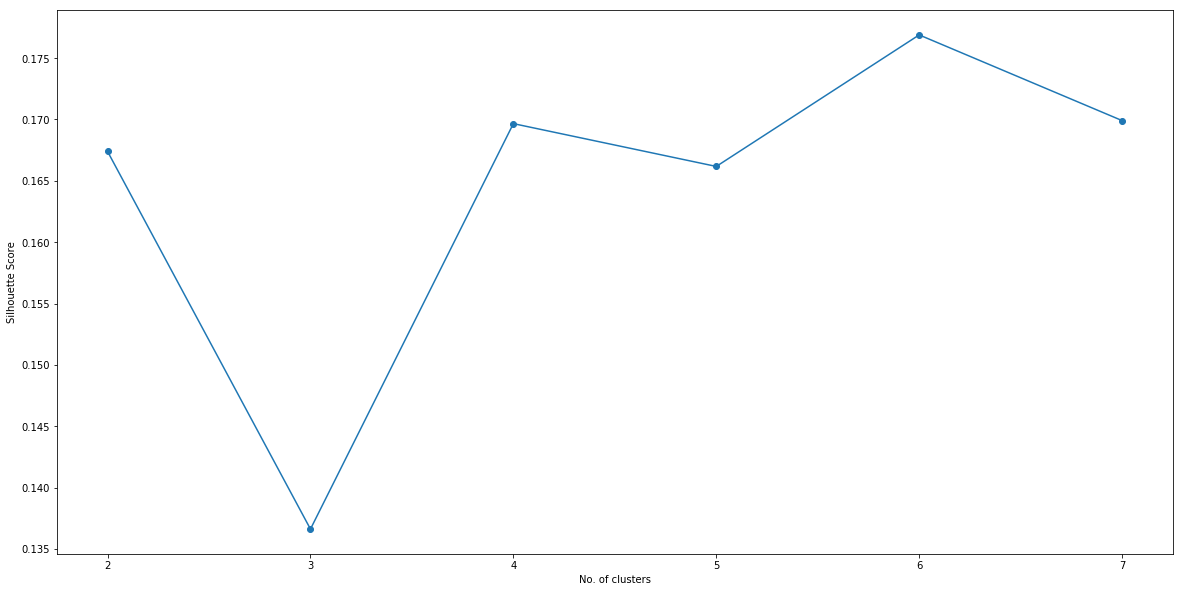

In [281]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

Apply K-means for the optimal number of clusters: 6 is the number of cluster to use. This is where the score is the highest.

In [282]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(vancouver_grouped_clustering)

kmeans.labels_[0:10]


array([1, 2, 2, 1, 0, 5, 1, 1, 3, 4], dtype=int32)

In [283]:
vancouver_grouped_clustering.head()

,Accessories Store,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Beach,Beer Garden,Belgian Restaurant,Bike Trail,Bistro,Board Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dog Run,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Flower Shop,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,German Restaurant,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Hobby Shop,Hockey Arena,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Inn,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Night Market,Nightclub,Noodle House,Office,Outdoor Sculpture,Outdoor Supply Store,Park,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,Social Club,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tech Startup,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trade School,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Yoga Studio
0,0.00,0.00,0.0,0.00,0.00,0.037037,0.0,0.0,0.0,0.0,0.074074,0.037037,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.037037,0.00,0.037037,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000000,0.037037,0.00,0.00,0.00,0.074074,0.0,0.0,0.00,0.00,0.037037,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.00,0.000000,0.0,0.00,0.0,0.000000,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.037037,0.0,0.00,0.0,0.0,0.037037,0.0,0.0,0.0,0.00,0.037037,0.00,0.00,0.00,0.037037,0.000000,0.0,0.0,0.037037,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.037037,0.00,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.000000,0.0,0.00,0.0,0.074074,0.037037,0.037037,0.00,0.037037,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.037037,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.00,0.00,0.00,0.111111,0.00,0.0,0.00,0.037037,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.000000,0.00,0.0,0.0,0.00
1,0.00,0.01,0.0,0.01,0.01,0.000000,0.0,0.0,0.0,0.0,0.010000,0.000000,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.02,0.00,0.01,0.01

New dataframe with top venues for each neighborhoods and cluster labels:

In [284]:
neighbors.rename(columns={'District':'Neighborhood'}, inplace=True)
neighbors.head()

,Neighborhood,Name,Latitude,Longitude
0,Vancouver-Downtown,Downtown,49.283393,-123.117456
1,Vancouver-False Creek,False Creek,49.274751,-123.106131
2,Vancouver-Fraserview,Fraserview,49.218416,-123.073287
3,Vancouver-Hastings,Hastings,49.280673,-123.032600
4,Vancouver-Arbutus ridge,Arbutus ridge,49.240968,-123.167001


In [285]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4 Most common venue,5 Most common venue,6 Most common venue,7 Most common venue,8 Most common venue,9 Most common venue,10 Most common venue
0,Vancouver-Arbutus ridge,Sushi Restaurant,Coffee Shop,Park,Bakery,Burger Joint,Ice Cream Shop,Bubble Tea Shop,Chocolate Shop,Italian Restaurant,Liquor Store
1,Vancouver-Burrard,Hotel,Dessert Shop,Food Truck,Japanese Restaurant,Sandwich Place,Coffee Shop,Plaza,Italian Restaurant,Gym,Donut Shop
2,Vancouver-Downtown,Hotel,Dessert Shop,Coffee Shop,Restaurant,Sandwich Place,Plaza,Food Truck,Japanese Restaurant,Gym,Italian Restaurant
3,Vancouver-False Creek,Coffee Shop,Bakery,Pizza Place,Café,Brewery,Sandwich Place,Asian Restaurant,Restaurant,Italian Restaurant,Taco Place
4,Vancouver-Fraserview,Pizza Place,Bus Stop,Gas Station,Bus Station,Park,Sporting Goods Shop,Convenience Store,Electronics Store,Flower Shop,Restaurant


In [286]:
neighborhoods_venues_sorted.insert(0,'Cluster Labels', kmeans.labels_)
vancouver_merged = neighbors
vancouver_merged = vancouver_merged.join (neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
vancouver_merged

,Neighborhood,Name,Latitude,Longitude,Cluster Labels,1st Most common venue,2nd Most common venue,3rd Most common venue,4 Most common venue,5 Most common venue,6 Most common venue,7 Most common venue,8 Most common venue,9 Most common venue,10 Most common venue
0,Vancouver-Downtown,Downtown,49.283393,-123.117456,2.0,Hotel,Dessert Shop,Coffee Shop,Restaurant,Sandwich Place,Plaza,Food Truck,Japanese Restaurant,Gym,Italian Restaurant
1,Vancouver-False Creek,False Creek,49.274751,-123.106131,1.0,Coffee Shop,Bakery,Pizza Place,Café,Brewery,Sandwich Place,Asian Restaurant,Restaurant,Italian Restaurant,Taco Place
2,Vancouver-Fraserview,Fraserview,49.218416,-123.073287,0.0,Pizza Place,Bus Stop,Gas Station,Bus Station,Park,Sporting Goods Shop,Convenience Store,Electronics Store,Flower Shop,Restaurant
3,Vancouver-Hastings,Hastings,49.280673,-123.032600,5.0,Theme Park Ride / Attraction,Park,Theme Park,Café,Sushi Restaurant,Coffee Shop,Soccer Field,Event Space,Pizza Place,College Gym
4,Vancouver-Arbutus ridge,Arbutus ridge,49.240968,-123.167001,1.0,Sushi Restaurant,Coffee Shop,Park,Bakery,Burger Joint,Ice Cream Shop,Bubble Tea Shop,Chocolate Shop,Italian Restaurant,Liquor Store
5,Vancouver-Kingsway,Kingsway,49.256732,-123.089712,1.0,Vietnamese Restaurant,Bakery,Pizza Place,Coffee Shop,Sushi Restaurant,Mexican Restaurant,Café,Chinese Restaurant,Park,Breakfast Spot
6,Vancouver-Langara,Langara,49.219437,-123.118026,3.0,Bus Stop,Park,Bubble Tea Shop,Coffee Shop,Café,Liquor Store,Sandwich Place,Field,Bank,Theater
7,Vancouver-Mount Pleasant,Mount Pleasant,49.263330,-123.096588,1.0,Coffee Shop,Brewery,Bakery,Sushi Restaurant,Vietnamese Restaurant,Pizza Place,Park,Lounge,Bar,Mexican Restaurant
8,Vancouver-Renfrew-Collingwood,Renfrew-Collingwood,49.242024,-123.057679,4.0,Vietnamese Restaurant,Chinese Restaurant,Bus Stop,Bus Station,Asian Restaurant,Park,Grocery Store,Bank,Café,Cantonese Restaurant
9,Vancouver-Yaletown,Yaletown,49.276322,-123.120956,2.0,Hotel,Italian Restaurant,Café,Yoga Studio,Japanese Restaurant,Park,Seafood Restaurant,Restaurant,French Restaurant,Mexican Restaurant


In [287]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster in zip(vancouver_merged['Latitude'], vancouver_merged['Longitude'], vancouver_merged['Neighborhood'], vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + 'Cluster' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius =5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters


Clusters map visualize above.

Breakdown of nebighborhoods by cluster label:

In [288]:
#Cluster 1 - outer district 
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 0, vancouver_merged.columns[[0]+list(range(5, vancouver_merged.shape[1]))]]



,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4 Most common venue,5 Most common venue,6 Most common venue,7 Most common venue,8 Most common venue,9 Most common venue,10 Most common venue
2,Vancouver-Fraserview,Pizza Place,Bus Stop,Gas Station,Bus Station,Park,Sporting Goods Shop,Convenience Store,Electronics Store,Flower Shop,Restaurant


In [289]:
#Cluster 2
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 1, vancouver_merged.columns[[0]+list(range(5, vancouver_merged.shape[1]))]]



,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4 Most common venue,5 Most common venue,6 Most common venue,7 Most common venue,8 Most common venue,9 Most common venue,10 Most common venue
1,Vancouver-False Creek,Coffee Shop,Bakery,Pizza Place,Café,Brewery,Sandwich Place,Asian Restaurant,Restaurant,Italian Restaurant,Taco Place
4,Vancouver-Arbutus ridge,Sushi Restaurant,Coffee Shop,Park,Bakery,Burger Joint,Ice Cream Shop,Bubble Tea Shop,Chocolate Shop,Italian Restaurant,Liquor Store
5,Vancouver-Kingsway,Vietnamese Restaurant,Bakery,Pizza Place,Coffee Shop,Sushi Restaurant,Mexican Restaurant,Café,Chinese Restaurant,Park,Breakfast Spot
7,Vancouver-Mount Pleasant,Coffee Shop,Brewery,Bakery,Sushi Restaurant,Vietnamese Restaurant,Pizza Place,Park,Lounge,Bar,Mexican Restaurant
13,Vancouver-Kitsilano,Coffee Shop,Bakery,Yoga Studio,Restaurant,Vegetarian / Vegan Restaurant,Pizza Place,Board Shop,Japanese Restaurant,Café,Pharmacy


In [290]:
#Cluster 3
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 2, vancouver_merged.columns[[0]+list(range(5, vancouver_merged.shape[1]))]]

,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4 Most common venue,5 Most common venue,6 Most common venue,7 Most common venue,8 Most common venue,9 Most common venue,10 Most common venue
0,Vancouver-Downtown,Hotel,Dessert Shop,Coffee Shop,Restaurant,Sandwich Place,Plaza,Food Truck,Japanese Restaurant,Gym,Italian Restaurant
9,Vancouver-Yaletown,Hotel,Italian Restaurant,Café,Yoga Studio,Japanese Restaurant,Park,Seafood Restaurant,Restaurant,French Restaurant,Mexican Restaurant
10,Vancouver-West End,Hotel,Dessert Shop,Japanese Restaurant,Bakery,Food Truck,Park,Café,Italian Restaurant,Sushi Restaurant,Sandwich Place
15,Vancouver-Burrard,Hotel,Dessert Shop,Food Truck,Japanese Restaurant,Sandwich Place,Coffee Shop,Plaza,Italian Restaurant,Gym,Donut Shop


In [291]:
#Cluster 4 - outer district 
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 3, vancouver_merged.columns[[0]+list(range(5, vancouver_merged.shape[1]))]]

,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4 Most common venue,5 Most common venue,6 Most common venue,7 Most common venue,8 Most common venue,9 Most common venue,10 Most common venue
6,Vancouver-Langara,Bus Stop,Park,Bubble Tea Shop,Coffee Shop,Café,Liquor Store,Sandwich Place,Field,Bank,Theater


In [292]:
#Cluster 5
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 4, vancouver_merged.columns[[0]+list(range(5, vancouver_merged.shape[1]))]]

,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4 Most common venue,5 Most common venue,6 Most common venue,7 Most common venue,8 Most common venue,9 Most common venue,10 Most common venue
8,Vancouver-Renfrew-Collingwood,Vietnamese Restaurant,Chinese Restaurant,Bus Stop,Bus Station,Asian Restaurant,Park,Grocery Store,Bank,Café,Cantonese Restaurant
11,Vancouver-Marpole,Chinese Restaurant,Sushi Restaurant,Japanese Restaurant,Vietnamese Restaurant,Bus Stop,Bubble Tea Shop,Pizza Place,Bank,Café,Burger Joint
16,Vancouver-Little Mountain,Coffee Shop,Chinese Restaurant,Café,Farmers Market,Vietnamese Restaurant,Japanese Restaurant,Sporting Goods Shop,Garden,Park,Bus Stop


In [293]:
#Cluster 6 - outer district 
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 5, vancouver_merged.columns[[0]+list(range(5, vancouver_merged.shape[1]))]]

,Neighborhood,1st Most common venue,2nd Most common venue,3rd Most common venue,4 Most common venue,5 Most common venue,6 Most common venue,7 Most common venue,8 Most common venue,9 Most common venue,10 Most common venue
3,Vancouver-Hastings,Theme Park Ride / Attraction,Park,Theme Park,Café,Sushi Restaurant,Coffee Shop,Soccer Field,Event Space,Pizza Place,College Gym


Cluster number 5 contains districts where a lot of Asian cuisine venues are already located, probably not a suitable area for the new restaurant due to increased competition over the same niche.

Based on cluster segmentation above, we learn that in cluster 3 the hotel category is the top venue, which might not be a right candidate for our restaurant. 

Clusters data shows us that the number 1,4 and 6 clusters are outer districts, therefore might not want to setup the restaurant location around them.

Cluster number 2 is the largest cluster out of the total of 6. It contains many gastronomy related venues. They range from coffee shops, backeries, sushi and pizza places to various restaurants such as those with Vietnamese, Italian or mexican gastronomy. Based on this, we can advise the owner of the new restaurant to consider places inside this cluster as potential location. Cluster number 2 area is the one that the business would best benefit from. Districts inside this cluster are the best candidates due to its restaurant places but also due to its central location in down town part of the city where tourists are most interested visiting.